In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv'

In [4]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


#### finding missing and duplicated values 

In [5]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

There is no  missing values. The data is all clean

In [1]:

data.duplicated().sum()

NameError: name 'data' is not defined

There is no duplicated data either

In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:

data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:

data[" loan_status"].value_counts()


 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [10]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EDA

<Axes: xlabel=' loan_status', ylabel=' loan_term'>

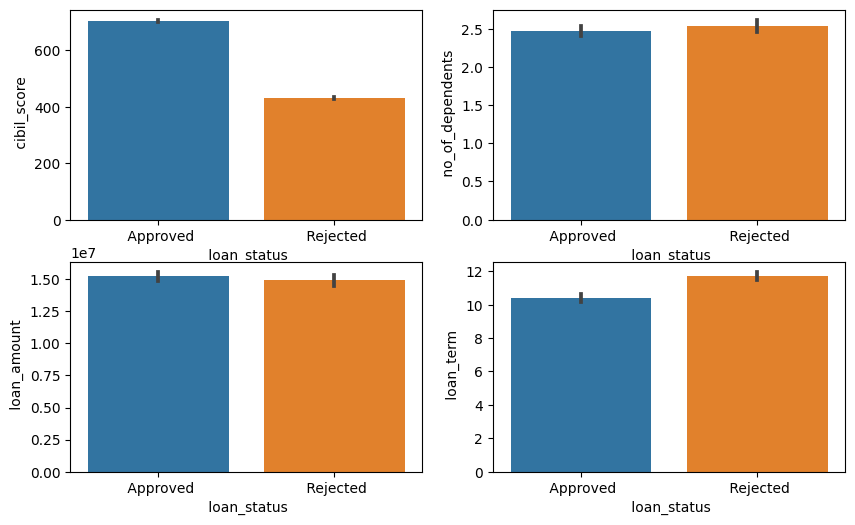

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(data = data,x = " loan_status",y = " cibil_score")
plt.subplot(2,2,2)
sns.barplot(data = data,x = " loan_status",y = " no_of_dependents")
plt.subplot(2,2,3)
sns.barplot(data = data,x = " loan_status",y = " loan_amount")
plt.subplot(2,2,4)
sns.barplot(data = data,x = " loan_status",y = " loan_term")

In [12]:
data.loc[(data[" cibil_score"]> 740 ) & (data[" loan_status"] == " Rejected")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
1446,1447,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
3527,3528,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
4099,4100,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected


There are total in seven customers whose cibil score is very high but their loan application was rejected.

let's look at other aspects.

The other one factor affects the approval of application is annual income let's see how it affects.

In [13]:
data.loc[(data[" cibil_score"] > 740) & 
         (data[" no_of_dependents"] >1)]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
15,16,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved
29,30,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved
33,34,5,Not Graduate,Yes,8400000,22000000,2,830,3800000,3900000,19900000,5400000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,4248,3,Not Graduate,No,3100000,9800000,12,820,6400000,5200000,10900000,4400000,Approved
4249,4250,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved
4253,4254,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved


In [14]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
data.corr(numeric_only=True)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


<Axes: xlabel=' no_of_dependents', ylabel='count'>

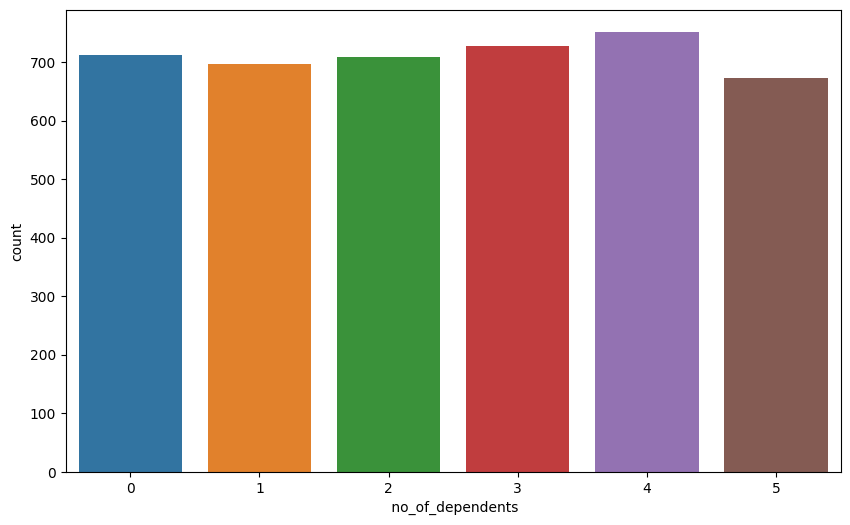

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data = data,x = " no_of_dependents")

In [17]:
data.loc[(data[" no_of_dependents"] == 1) & 
(data[" loan_status"] ==" Rejected") & 
(data[ ' cibil_score'] > 740)]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1446,1447,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected


In [18]:
x = data.drop([" loan_status"],axis = 1)
y = data[" loan_status"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2,random_state = 42)

#### Chi squared test

In [21]:
from scipy.stats import chi2_contingency

cg_table = pd.crosstab(data[" education"],data[' loan_status'])

In [22]:
chi2,p,dof,exp = chi2_contingency(cg_table)

In [23]:
print("chi square value", chi2)
print("degree of freedom",dof)
print("p_value",p)
print("expected frequency table", exp)

chi square value 0.08395754138250573
degree of freedom 1
p_value 0.7720042291016309
expected frequency table [[1333.91051769  810.08948231]
 [1322.08948231  802.91051769]]


There are more features are mentioned in dataset. Let's dive into this

lets see the analysis around Residential Assets value
it is estimated worth of residential property. 
meant for living like apartments, house. it reflects at how much rate the property can be sell at current situation.

High property value == high loan eligibility

In [24]:
data.loc[(data[" residential_assets_value"]== data[" residential_assets_value"].max()) & (data[" loan_status"]==" Approved")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3119,3120,4,Not Graduate,No,9800000,29400000,8,592,29100000,16700000,35900000,9000000,Approved


In [25]:
data.loc[(data[" residential_assets_value"]== data[" residential_assets_value"].max()) & (data[" loan_status"]==" Rejected")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [26]:
data[" residential_assets_value"].max()

29100000

lets see the how income annum and loan_amount affect the status of loan

In [27]:
data.loc[
    (data[" income_annum"] < data[" loan_amount"]) & 
    (data[" loan_status"] == " Rejected") & (data[" cibil_score"] >740)
]


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
1446,1447,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
3527,3528,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
4099,4100,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected


on basis of laon_amount, income annum, loan_status and cibil score we can say that there are total 7 loan application is rejected even after better cibil score.

There are maybe some factors affecting. it can be commercial asset value or residential asset value

In [28]:
data.loc[
    (data[" income_annum"] < data[" loan_amount"]) & 
    (data[" loan_status"] == " Approved") & (data[" cibil_score"] >740)
]


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
15,16,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved
29,30,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,4250,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved
4253,4254,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved


so  We can see the difference between two tables clearly that the cibil score is better even residential,commercial,bank and luxury asset values are good in terms of getting a loan. 


# Feature engineering

In [29]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data[" education"] = le.fit_transform(data[" education"])
data[" self_employed"] = le.fit_transform(data[" self_employed"])
data[" loan_status"] = le.fit_transform(data[" loan_status"])


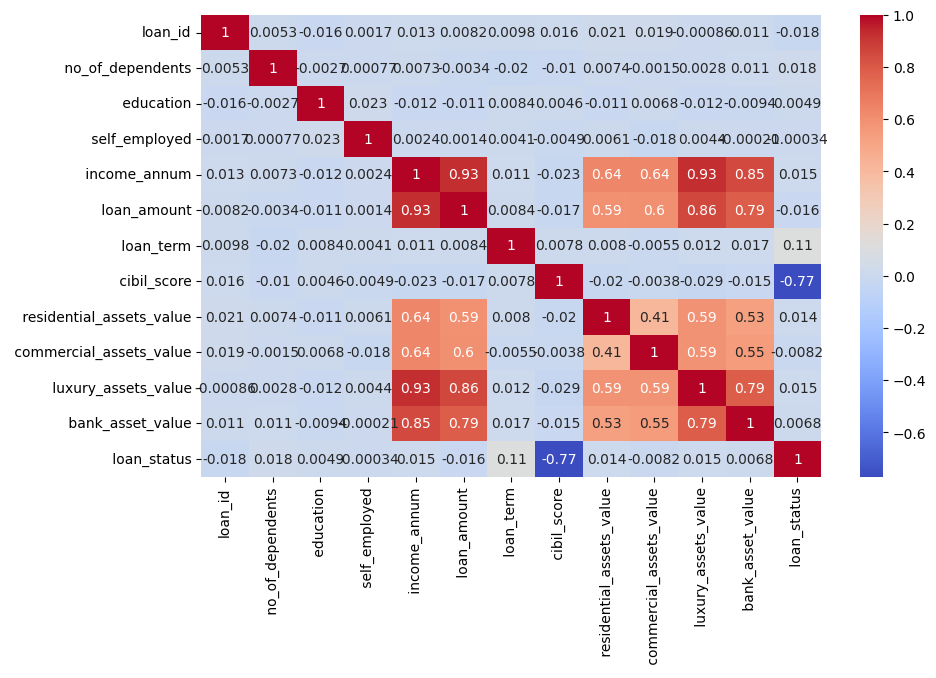

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


# Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [32]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Step 1: scale features
    ('classifier', LogisticRegression())               #step 2: define the model
])

In [33]:
x = data.drop([" loan_status"], axis = 1)
y = data[" loan_status"]

# Train test split

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [35]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [36]:
x_pred = pipeline.predict(xtest)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(ytest, x_pred))

Accuracy: 0.9074941451990632
